In [1]:
# import libraries
# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('heart disease classification dataset.csv')

# print the first 5 rows of the dataframe
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


# Exploratory Data Analysis

In [3]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [4]:
# data shpae
df.shape

(303, 15)

In [5]:
# Statistical description of numerical data
df.describe()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,87.612784,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,151.000000,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,226.500000,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,302.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


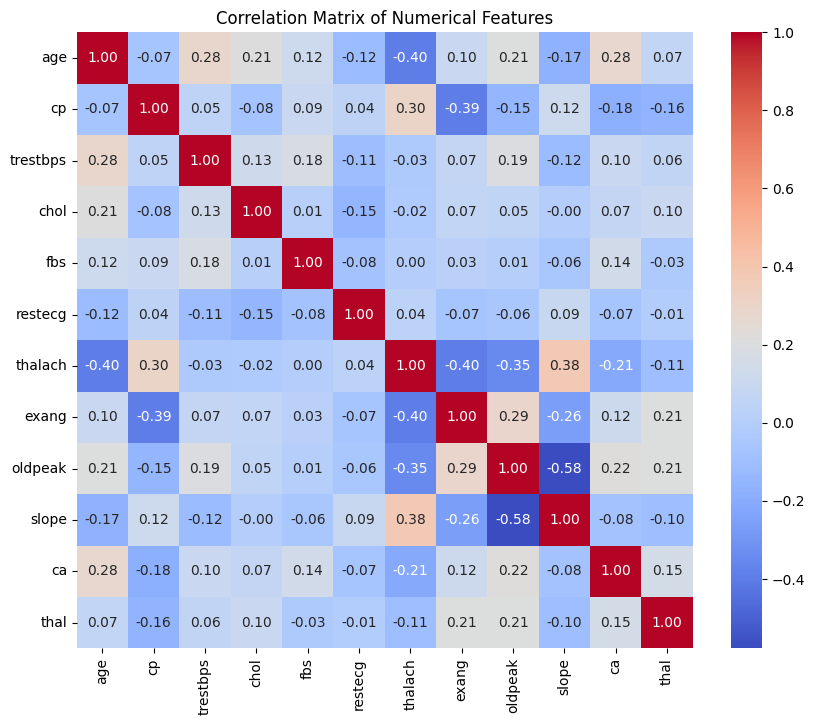

In [6]:
# Selecting numerical columns (excluding 'id' and the target variable 'num')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['Unnamed: 0'])
# Step 3: Correlation Analysis
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [7]:
# age column
df['age'].min(), df['age'].max()

(29, 77)

### Minimum age for a heart disease is 28

<Axes: xlabel='age', ylabel='Count'>

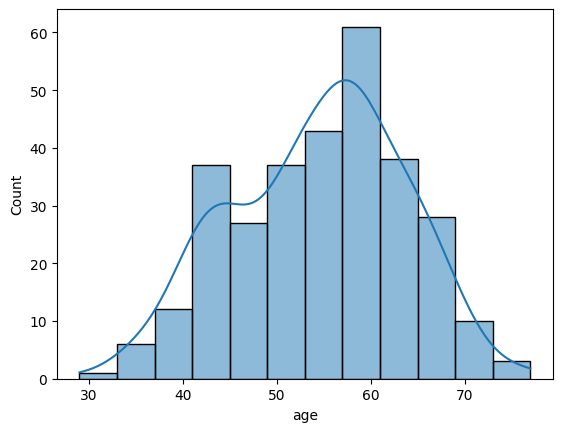

In [8]:
# draw a histogram to see the distribution of age column
sns.histplot(df['age'], kde=True)

Mean: 54.366336633663366
Median: 55.0
Mode: 58


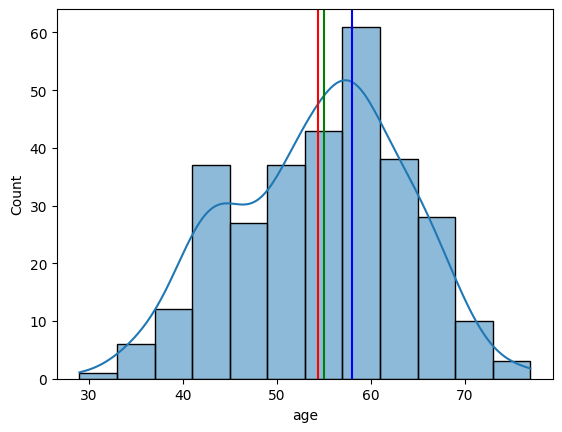

In [9]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

### Most of the people having heart disease are of age  : 53 to 54 

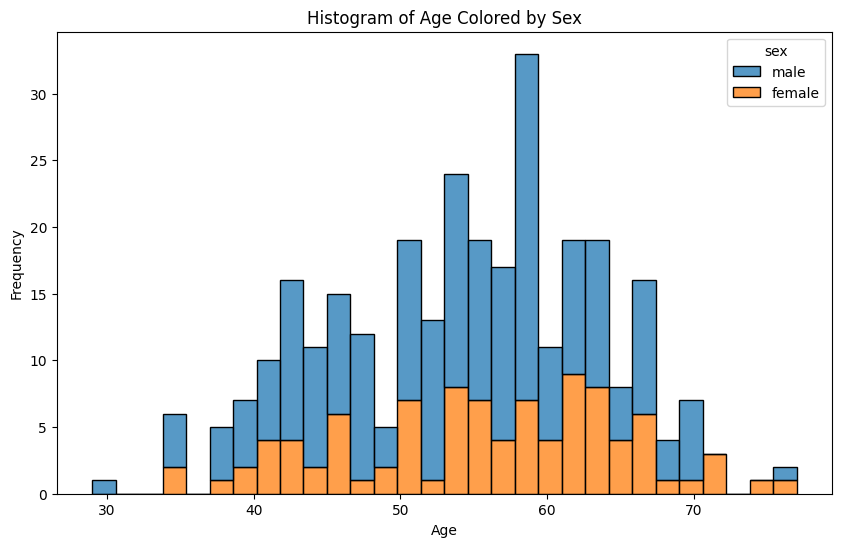

In [10]:
# Create a histogram of the age column, colored by sex
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.histplot(data=df, x='age', hue='sex', multiple='stack', bins=30)

# Add titles and labels
plt.title('Histogram of Age Colored by Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Most of the females and males having heart disease are of age  : 53 to 54 

In [11]:
# Count the number of males and females
male_count = df[df['sex'] == 'male'].shape[0]
female_count = df[df['sex'] == 'female'].shape[0]

In [12]:
total_count = male_count + female_count
# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 68.32%
Female Percentage in the data: 31.68%
Males are 115.62% more than females in the data.


### Males are 115.62% more than females in the data.

<Axes: xlabel='cp', ylabel='count'>

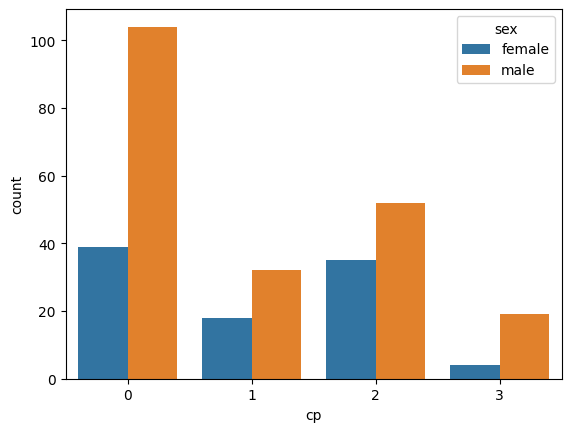

In [13]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue='sex')

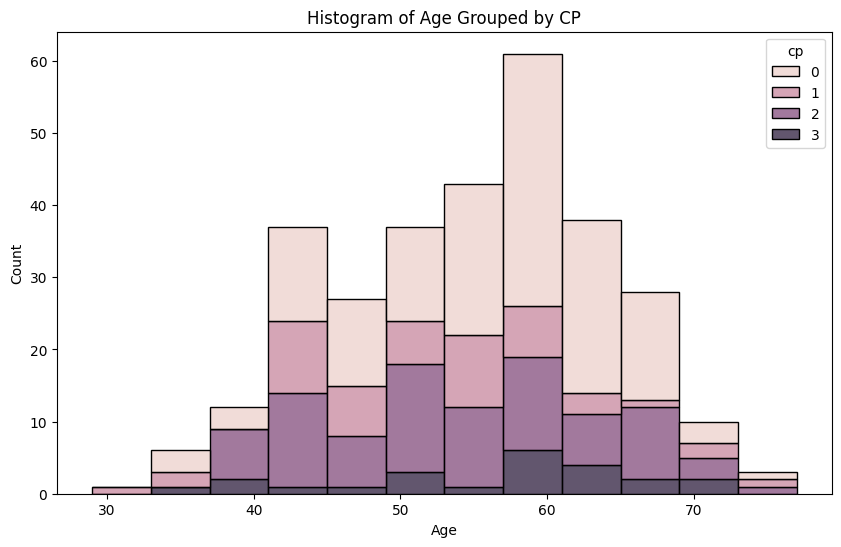

In [14]:
#Create a histogram of the age column grouped by cp column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=df, x='age', hue='cp', multiple='stack', kde=False)

# Add titles and labels
plt.title('Histogram of Age Grouped by CP')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

<Axes: xlabel='trestbps', ylabel='Count'>

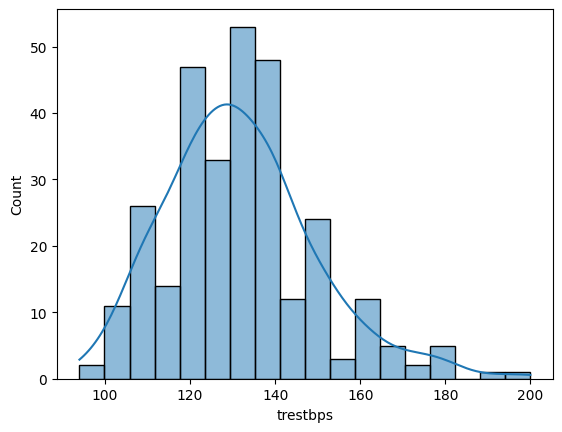

In [15]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

# Feature Engineering

In [16]:
print(f"The missing values given columns are:")
df.isnull().sum()

The missing values given columns are:


Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [17]:
# Remove rows with any null values
#df = df.dropna()

In [18]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [19]:
columns_to_remove = ['Unnamed: 0']
# Remove the specified columns
df = df.drop(columns=columns_to_remove)

In [20]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps', 'chol', 'thalach']

In [21]:
numeric_cols = ['trestbps', 'chol', 'thalach']

In [22]:
imputer = IterativeImputer(max_iter=10, random_state=42)
df['trestbps'] = imputer.fit_transform(df[['trestbps']])
df['chol'] = imputer.fit_transform(df[['chol']])
df['thalach'] = imputer.fit_transform(df[['thalach']])

In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

In [25]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_male
0,63,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,yes,True
1,37,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,yes,True
2,41,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,yes,False
3,56,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,yes,True
4,57,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,yes,False


# Test train split for training the model

In [26]:
df['target'].value_counts()

target
yes    165
no     138
Name: count, dtype: int64

In [27]:
df['target'] = df['target'].map({'yes': 1, 'no': 0})

In [28]:
# split the data into X and y
X = df.drop('target', axis=1)
y = df['target']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

In [31]:
# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.8345514950166113
Test Accuracy: 0.8021978021978022

Model: Gradient Boosting
Cross-validation Accuracy: 0.7591362126245847
Test Accuracy: 0.7472527472527473

Model: Support Vector Machine
Cross-validation Accuracy: 0.6032115171650057
Test Accuracy: 0.7032967032967034

Model: Logistic Regression
Cross-validation Accuracy: 0.8156146179401993
Test Accuracy: 0.8131868131868132

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.6601328903654485
Test Accuracy: 0.6263736263736264

Model: Decision Tree
Cross-validation Accuracy: 0.735437430786268
Test Accuracy: 0.7032967032967034

Model: Ada Boost
Cross-validation Accuracy: 0.7595791805094131
Test Accuracy: 0.8131868131868132

Model: XG Boost
Cross-validation Accuracy: 0.8110741971207087
Test Accuracy: 0.8131868131868132

Model: Naive Bayes
Cross-validation Accuracy: 0.8012181616832781
Test Accuracy: 0.8351648351648352

Best Model: Pipeline(steps=[('model', GaussianNB())])
